In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fun
import ast
import warnings
warnings.filterwarnings("ignore")

# Steam_Games

In [2]:
# Se cargan los datos en un DataFrame
df_games = pd.read_csv('./data/games.csv', encoding='utf-8')
df_games

,Id_game,App_name,Release_year,Genres,Specs,Price,Early_access,Developer
0,10,Counter-Strike,2000,['Action'],"['Multi-player', 'Valve Anti-Cheat enabled']",9.99,0,Valve
1,20,Team Fortress Classic,1999,['Action'],"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0,Valve
2,30,Day of Defeat,2003,['Action'],"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0,Valve
3,40,Deathmatch Classic,2001,['Action'],"['Multi-player', 'Valve Anti-Cheat enabled']",4.99,0,Valve
4,50,Half-Life: Opposing Force,1999,['Action'],"['Single-player', 'Multi-player', 'Valve Anti-...",4.99,0,Gearbox Software
...,...,...,...,...,...,...,...,...
22503,2028055,Tom Clancy's Ghost Recon Future Soldier - Seas...,2012,['Action'],"['Single-player', 'Multi-player', 'Co-op', 'Do...",24.99,0,"Ubisoft Paris,Red Storm Entertainment"
22504,2028056,Worms Revolution Season Pass,2012,['Strategy'],"['Single-player', 'Multi-player', 'Co-op', 'Sh...",14.99,0,Team17 Digital Ltd.
22505,2028062,Call of Duty®: Black Ops II Season Pass,No_Data,['Action'],"['Single-player', 'Multi-player', 'Co-op', 'Do...",49.99,0,Treyarch
22506,2028103,Assassin’s Creed® III Season Pass,2012,"['Action', 'Adventure']","['Single-player', 'Multi-player', 'Downloadabl...",29.99,0,Ubisoft Montreal


In [3]:
# Se revisan los tipod de datos y nulos
fun.tipo_dato(df_games)

Id_game (nulos) =  0
App_name (nulos) =  0
Release_year (nulos) =  0
Genres (nulos) =  0
Specs (nulos) =  0
Price (nulos) =  0
Early_access (nulos) =  0
Developer (nulos) =  0

 filas completamente nulas:  0


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,Id_game,[<class 'int'>],100.0,0.0
1,App_name,[<class 'str'>],100.0,0.0
2,Release_year,[<class 'str'>],100.0,0.0
3,Genres,[<class 'str'>],100.0,0.0
4,Specs,[<class 'str'>],100.0,0.0
5,Price,[<class 'float'>],100.0,0.0
6,Early_access,[<class 'int'>],100.0,0.0
7,Developer,[<class 'str'>],100.0,0.0


In [4]:
#Se realiza una transformacion de los datos de la columna Genres

# Se crea una lista vacía para almacenar los géneros individuales
generos_individuales = []

# Se Itera a través de las listas de géneros en la columna 'genres'
for genre in df_games['Genres']:
    try:
        # Se interpreta la cadena como una lista usando ast.literal_eval
        genre_list = ast.literal_eval(genre)
        if isinstance(genre_list, list):
            generos_individuales.extend(genre_list)
    except (SyntaxError, ValueError):
        # Manejo de errores en la interpretación de cadena
        pass


In [5]:
# se crea un DataFrame con los géneros individuales
df_generos = pd.DataFrame({'genre': generos_individuales})

# se cuenta la frecuencia de cada género
conteo_generos = df_generos['genre'].value_counts()

In [6]:
# Cantidad de juegos totales
total_juegos = len(df_games['Id_game'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 22508


In [7]:
# Lista de gnera  y el total de juegos para cada uno
conteo_generos

genre
Indie                        12676
Action                        9423
Adventure                     7014
Casual                        6280
Strategy                      5212
Simulation                    4722
RPG                           3803
Free to Play                  1456
Early Access                  1358
Sports                        1032
Racing                         947
Massively Multiplayer          811
Design &amp; Illustration      264
Web Publishing                 195
Utilities                      138
Animation &amp; Modeling        83
Education                       53
Software Training               36
Audio Production                30
Video Production                18
Photo Editing                   11
Name: count, dtype: int64

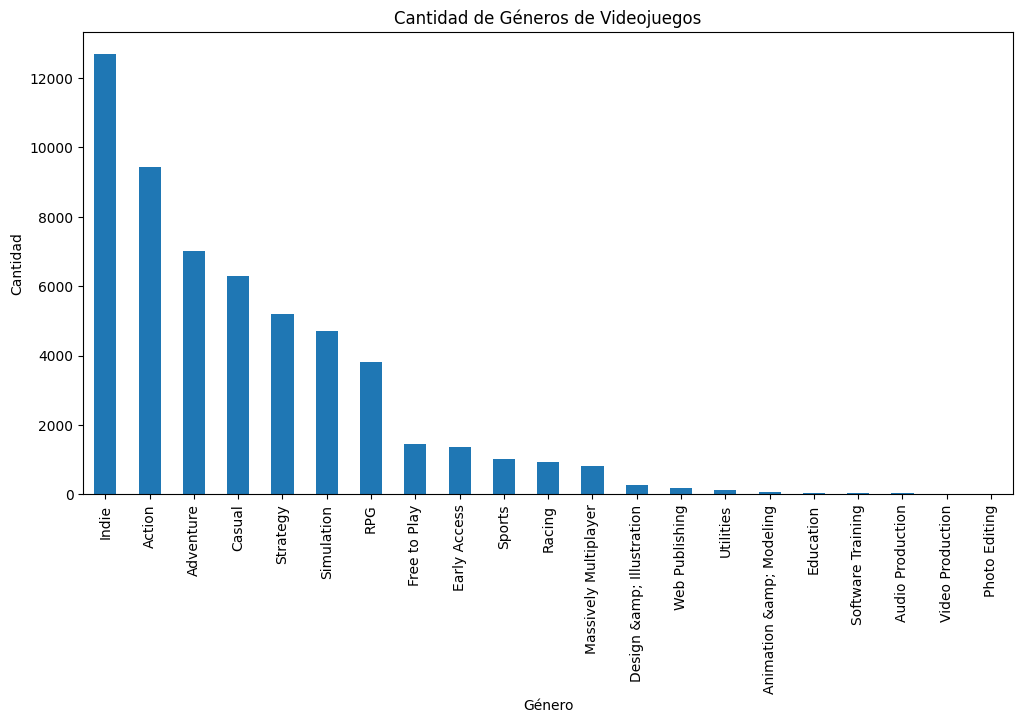

In [8]:
#Se grafica el genero y la cantidad de juegos que este posee 

plt.figure(figsize=(12, 6))
conteo_generos.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Cantidad de Géneros de Videojuegos')
plt.xticks(rotation=90)
plt.show()

La mayoría de los juegos se encuentran en las categorías "Indie", "Action", "Casual" y "Adventure", pero cabe resaltar que un juego puede estar asociado a mas de un genero.

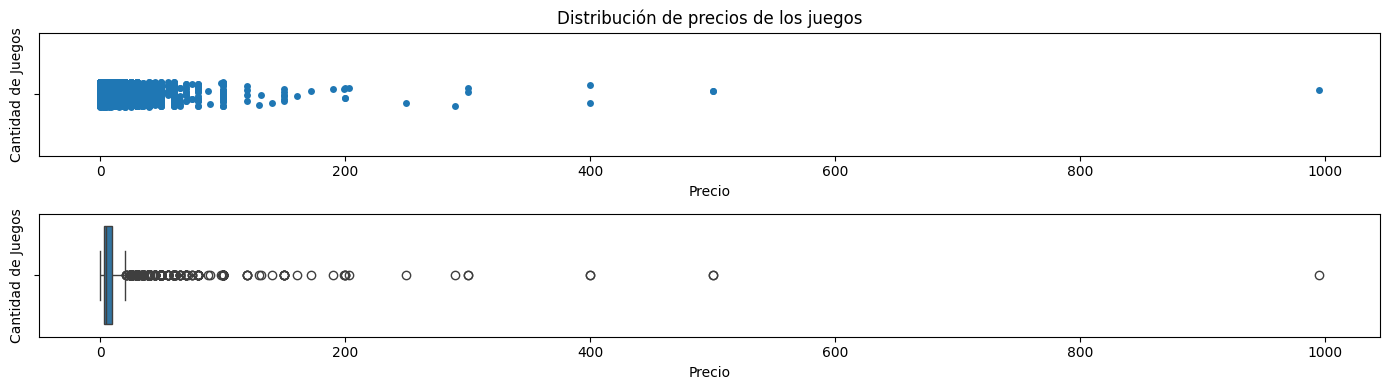

In [9]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_games.groupby('Id_game')['Price'].unique().reset_index().explode('Price')
df_precio_unicos = precio_unicos['Price']

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=precio_unicos, x='Price', ax=ax1)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=precio_unicos, x='Price', ax=ax2)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()


In [10]:
estadisticas = df_precio_unicos.astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {estadisticas[5]}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {estadisticas[6]}')
fun.bigote_maximo(pd.DataFrame(df_precio_unicos.astype(float))['Price'])

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.94
El 75% de los juegos tienen un precio menor de: 9.99
El bigote superior de la variable Price se ubica en: 20.49
Hay 1360 valores atípicos en la variable Price



El análisis revela que la mitad de los juegos tienen precios que varían entre 0 y 4.99 dólares, y tres cuartas partes de los juegos tienen precios que no exceden los 9.99 dólares. Sin embargo, se detectan 1,360 valores que podrían clasificarse como atípicos, ya que sus precios superan los 20.49 dólares. No obstante, se observan algunos juegos con precios de más de 100 dólares lo cual indicaria un error en el precio pero se realizo un seguimiento en la plataforma Steam evidenciando que existen juegos cuyo valor es alto y en la mayoria se trata de simuladores o programas de edicion.

# User_Reviews

In [11]:
# Se cargan los datos en un DataFrame
df_reviews = pd.read_csv('./data/reviews.csv', encoding='utf-8')
df_reviews

,Id_game,Review,Posted_date,Recommend
0,10,GYERTEK GAMELNI MINDENKI ITT VAN AKI SZ√ÅMIT !...,2012-07-24,1
1,10,Good Game :D,2012-04-07,1
2,10,"1,6 > go fk go.",2014-03-23,1
3,10,"Pure, hardcore Counter-Strike in its rawest fo...",2015-10-31,1
4,10,THE BEST FPS GAME!!!!!,2014-01-22,1
...,...,...,...,...
49181,423880,"This game, Is ‚ô•‚ô•‚ô•‚ô•ing glorious.Achieve...",2015-12-12,1
49182,423880,10/10 would waste my time again on games like ...,2015-12-23,1
49183,423880,10/10,2015-12-21,1
49184,423880,Do you like wasting a few minutes of your life...,2015-12-11,1


In [12]:
# Se revisan los tipod de datos y nulos
fun.tipo_dato(df_reviews)

Id_game (nulos) =  0
Review (nulos) =  27
Posted_date (nulos) =  0
Recommend (nulos) =  0

 filas completamente nulas:  0


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,Id_game,[<class 'int'>],100.00,0.00
1,Review,"[<class 'str'>, <class 'float'>]",99.95,0.05
2,Posted_date,[<class 'str'>],100.00,0.00
3,Recommend,[<class 'int'>],100.00,0.00


In [13]:
# Se agrupa 'recommend' para la cantidad de recomendaciones totales positivas y negativas  
agrupado = df_reviews.groupby('Recommend')
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

,Cantidad,Porcentaje
Recommend,,
0,5004,10.173627
1,44182,89.826373


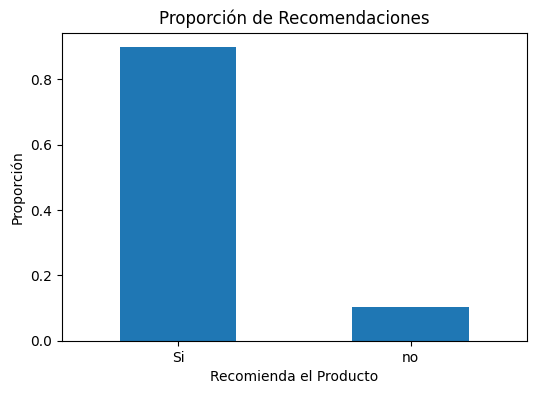

Proporción de recomendaciones:
Recommend
1    0.898264
0    0.101736
Name: proportion, dtype: float64


In [14]:
# Se realiza una grafico para ver la proporcion de Recomendaiciones en el DF
recomend = df_reviews['Recommend'].value_counts(normalize=True)

# Visualizar la proporción de recomendaciones
plt.figure(figsize=(6, 4))
recomend.plot(kind='bar', rot=0)
plt.title('Proporción de Recomendaciones')
plt.xlabel('Recomienda el Producto')
plt.ylabel('Proporción')
plt.xticks([0, 1], ['Si', 'no'])  # Etiquetas de los ejes x
plt.show()

# Imprimir resultados
print("Proporción de recomendaciones:")
print(recomend)

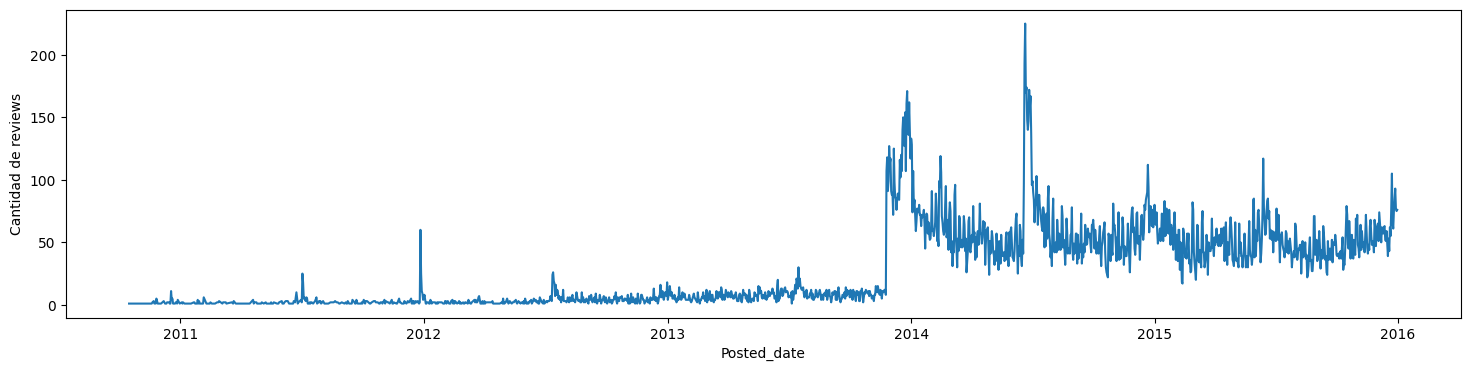

In [15]:
# Se crea un Df auxiliar 
df = df_reviews
#Se convierte a formato Fecha
df["Posted_date"] = pd.to_datetime(df["Posted_date"])
# Calcula la cantidad de review por fecha
df_counts = df.groupby("Posted_date").count()

# Grafica
plt.figure(figsize=(18, 4))
sns.lineplot(data=df_counts, x="Posted_date", y="Recommend")
plt.ylabel('Cantidad de reviews')
plt.show()

In [16]:
print('Días donde hunieron mas reviews')
df_counts.sort_values(by='Recommend', ascending=False)['Recommend'][:5]

Días donde hunieron mas reviews


Posted_date
2014-06-21    225
2014-06-20    193
2014-06-23    174
2014-06-27    172
2013-12-26    171
Name: Recommend, dtype: int64

Se nota que hasta aproximadamente 2014, la frecuencia de reseñas diarias es baja, con algunos momentos de alta actividad, pero posteriormente se ve un incremento en la cantidad de comentarios, alcanzando su punto máximo el 21 de junio de 2014 con un total de 225 reseñas en un solo día.

# User_Items

In [17]:
# Se cargan los datos en un DataFrame
df_items = pd.read_csv('./data/items.csv', encoding='utf-8')
df_items

,Id_game,Item_name,Playtime_forever,Steam_id,User_id
0,10,Counter-Strike,6,76561197970982479,76561197970982479
1,10,Counter-Strike,904,76561198021501439,cuckmagnet
2,10,Counter-Strike,336,76561197960568744,henarky
3,10,Counter-Strike,0,76561198065113275,Elite911
4,10,Counter-Strike,806,76561197962846221,cannedbees
...,...,...,...,...,...
5094087,529670,The Bellows: VR Demo,0,76561198095049646,CSMisBeast
5094088,529670,The Bellows: VR Demo,0,76561198001518866,chidvd
5094089,529820,Beyond Power VR,0,76561197960435530,robinwalker
5094090,530720,Solitaire Royale,0,76561198048151962,mayshowganmore


In [18]:
# Se revisan los tipod de datos y nulos
fun.tipo_dato(df_items)

Id_game (nulos) =  0
Item_name (nulos) =  0
Playtime_forever (nulos) =  0
Steam_id (nulos) =  0
User_id (nulos) =  0

 filas completamente nulas:  0


,Nombre_Columna,Tipo_dato,%_No_nulos,%_Nulos
0,Id_game,[<class 'int'>],100.0,0.0
1,Item_name,[<class 'str'>],100.0,0.0
2,Playtime_forever,[<class 'int'>],100.0,0.0
3,Steam_id,[<class 'int'>],100.0,0.0
4,User_id,[<class 'str'>],100.0,0.0


In [19]:
#Grafica de los 10 juegos mas top
# Se agrupa los datos nombre de juego y calcula la suma de las horas jugadas para cada juego.
top_games = df_items.groupby('Item_name')['Playtime_forever'].sum().reset_index()
# Se ordena 'top_games' descendentemente basado en las horas jugadas ('playtime_forever').
top_games = top_games.sort_values(by='Playtime_forever', ascending=False)

In [20]:
top_games

,Item_name,Playtime_forever
2117,Counter-Strike: Global Offensive,775816259
3944,Garry's Mod,441871026
9076,Terraria,152997644
9249,The Elder Scrolls V: Skyrim,134851450
10393,Warframe,122726853
...,...,...
10149,VRbloX,0
9506,The Room of Black & White,0
7962,See You Next Tuesday,0
1471,Button Frenzy,0


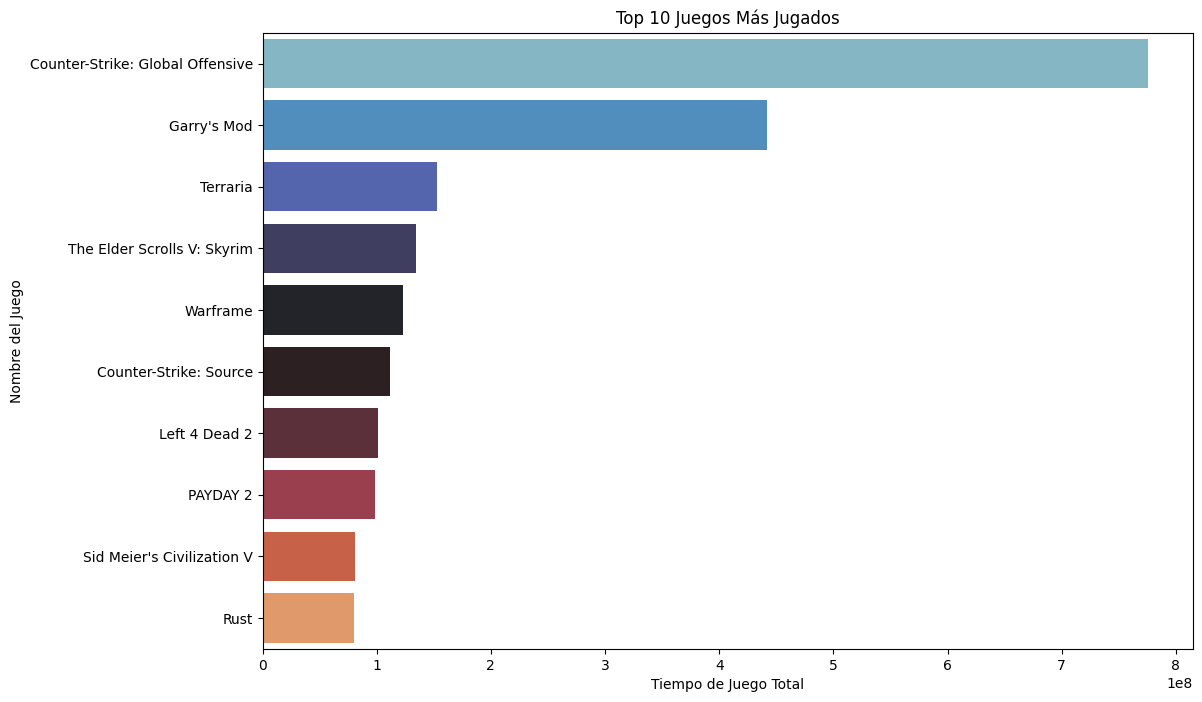

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Playtime_forever', y='Item_name', data=top_games.head(10), palette="icefire")
plt.title('Top 10 Juegos Más Jugados')
plt.xlabel('Tiempo de Juego Total')
plt.ylabel('Nombre del Juego')
plt.show()

Se observa que el juego con mas cantidadde horas jugadas es Counter Strike: Global Offensive con un total de 775816259 horas, seguido de Garry's Mod con 441871026 horas y Terraria con 152997644 horas 